# 1) Load Dependencies

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from src.paper import pull_results, plot_metrics, create_descriptives, latex_exporter
from src.utils import csv_exporter
from src.utils.paths import *
from statsmodels.tsa.stattools import adfuller, kpss

# 2) Pull Results from Pipeline

In [4]:
# Use a specific timestamp, otherwise it just uses "latest"
# timestamp = "YYYYMMDD-hhmm"

# File names to analyze:
file_names = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"] + ['eurusd'] + ['eurusd_agg']

# Move pipeline results to "analyzed_data" folder
pull_results(timestamp="latest", file_prefix=file_names)

Finished pulling files!


# 3) Create Descriptive Table

In [5]:
# Select varibales to print in table
filter_variables = (["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"] + ['x1', 'x2', 'x3'] +  
                    ['bid_close'] + ['bid_close_agg'])

In [6]:
descriptives = create_descriptives(file_names, filter_variables)

In [7]:
# Show table
display(descriptives)

,start,end,count,mean,std,min,25%,50%,75%,max,NaN,freq
Data,,,,,,,,,,,,
RW,2004-01,2023-12,240.0,68.215495,10.103961,40.00000,61.588426,68.492171,74.799536,90.00000,0,MS
TrendSeasRW,2004-01,2023-12,240.0,65.212735,9.860455,40.00000,59.442427,65.278618,70.045723,90.00000,0,MS
WeakSARIMA,2004-01,2023-12,240.0,65.434632,9.932379,40.00000,59.695437,65.626215,70.117469,90.00000,0,MS
StrongSARIMA,2004-01,2023-12,240.0,65.665527,10.656031,40.00000,58.531350,66.647129,70.413462,90.00000,0,MS
SARIMAX,2004-01,2023-12,240.0,66.785970,12.470082,40.00000,56.642862,68.105724,75.746263,90.00000,0,MS
x1,2004-01,2023-12,240.0,360.268079,73.697749,200.00000,308.950805,381.153821,418.607367,500.00000,0,MS
x2,2004-01,2023-12,240.0,57.956553,8.979728,40.00000,50.990507,56.779285,64.344842,80.00000,0,MS
x3,2004-01,2023-12,240.0,923.168300,12.484585,900.00000,914.459089,921.004521,933.860990,950.00000,0,MS
bid_close,2020-01-01 00:00:00,2024-02-06 00:00:00,101921.0,1.114271,0.062135,0.95386,1.073250,1.101530,1.174540,1.23462,41792,15T


In [8]:
# Export as csv
csv_exporter(TABLE_DIR, descriptives)


Exporting descriptives as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!


In [9]:
# Print and Export to LaTex
caption = "Descriptive Statistics"
# latex_exporter(descriptives, caption=caption)
with open(os.path.join(TABLE_DIR, "descriptives.tex"), "w") as f:
    f.write(latex_exporter(descriptives.round(2).astype(str), caption=caption))

In [10]:
# Note: \usepackage{booktaps} in LaTex

# 4) Create Metrics Ranking Table

In [11]:
ranking_data = [os.path.join(PAPERDATA_DIR, file) for file in os.listdir(PAPERDATA_DIR) if file.endswith
("metrics_ranking.csv")]

In [12]:
# Print and export to LaTex and csv
file_names = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"] + ['eurusd']
ranking_list = []
for i, file in enumerate(file_names):
    ranking = pd.read_csv(os.path.join(PAPERDATA_DIR, f"{file}_metrics_ranking.csv"), index_col="Model")
    ranking_list.append(ranking)
    caption = f"Ranking Forecasters and Ensemblers by Predictive Performance - Data Complexity: {i + 1}"
    
    # print(f"Table for Complexity {i+1}\n")
    # print(latex_exporter(df, caption=caption))
    # print("\n")
    # Export to LaTex
    with open(os.path.join(TABLE_DIR, f"{file}_metrics_ranking.tex"), "w") as f:
        f.write(latex_exporter(ranking.round(3).astype(str), caption=caption))
    # Export to csv
    csv_exporter(TABLE_DIR, ranking, file_names=f"{file}_metrics_ranking")
    
    print(f"\nRanking for {file}:")
    display(ranking)


Exporting RW_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for RW:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse Variance,0.056137,4.984609,3.719821,1,2,1
Weighted Ensemble: Inverse RMSE,0.056352,5.002579,3.733871,2,3,2
Weighted Ensemble: Simple,0.056642,5.033457,3.753291,3,5,3
AutoTheta,0.056935,4.951562,3.767992,4,1,4
AutoSARIMA,0.057145,5.017356,3.782219,5,4,5
Naive,0.059176,5.149567,3.925315,6,6,6
Weighted Ensemble: Inverse Error Covariance,0.059647,5.211749,3.952922,7,7,7
Exponential Smoothing,0.060308,5.274425,4.000638,8,8,8
TiDE,0.061034,5.395124,4.047699,9,9,9



Exporting TrendSeasRW_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for TrendSeasRW:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse Variance,0.034969,3.142844,2.330395,1,1,1
Weighted Ensemble: Inverse RMSE,0.035057,3.150374,2.336016,2,2,2
Weighted Ensemble: Simple,0.035058,3.151048,2.336445,3,3,3
Weighted Ensemble: Inverse Error Covariance,0.037188,3.318728,2.476791,4,5,4
Exponential Smoothing,0.037530,3.340527,2.498175,5,6,6
AutoSARIMA,0.037537,3.244438,2.497060,6,4,5
AutoTheta,0.038564,3.405900,2.566496,7,7,7
TiDE,0.038783,3.555382,2.585410,8,10,8
Meta Ensemble: SVR,0.038787,3.435591,2.588056,9,8,9



Exporting WeakSARIMA_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for WeakSARIMA:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse Variance,0.028514,2.577474,1.901336,1,1,1
Weighted Ensemble: Simple,0.028550,2.590860,1.903842,2,3,2
Weighted Ensemble: Inverse RMSE,0.028590,2.585070,1.906166,3,2,3
AutoSARIMA,0.030213,2.638002,2.011089,4,4,4
Exponential Smoothing,0.030866,2.743687,2.056202,5,5,5
Weighted Ensemble: Inverse Error Covariance,0.030954,2.763787,2.062406,6,6,6
AutoTheta,0.032079,2.822191,2.136678,7,8,7
Meta Ensemble: SVR,0.032303,2.927370,2.156422,8,10,8
Meta Ensemble: Random Forest,0.032714,2.917809,2.186314,9,9,9



Exporting StrongSARIMA_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for StrongSARIMA:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse RMSE,0.021499,1.968394,1.434097,1,2,1
Weighted Ensemble: Inverse Variance,0.021629,1.985681,1.443055,2,3,2
Weighted Ensemble: Simple,0.021811,2.009829,1.455137,3,4,4
AutoSARIMA,0.021833,1.947366,1.454290,4,1,3
Exponential Smoothing,0.022482,2.013837,1.498544,5,5,5
Naive,0.022841,2.014759,1.522180,6,6,6
AutoTheta,0.023318,2.080418,1.554293,7,7,7
Meta Ensemble: Random Forest,0.023490,2.173702,1.566722,8,9,8
Weighted Ensemble: Inverse Error Covariance,0.023773,2.240533,1.578863,9,10,9



Exporting SARIMAX_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for SARIMAX:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse RMSE,0.027950,2.652159,1.863528,1,2,2
AutoSARIMAX with covariates,0.027973,2.613503,1.863506,2,1,1
Weighted Ensemble: Inverse Variance,0.028044,2.663745,1.870505,3,4,4
Weighted Ensemble: Simple,0.028066,2.669684,1.871952,4,5,5
AutoSARIMA,0.028086,2.655436,1.870248,5,3,3
Naive,0.028448,2.736189,1.893638,6,7,6
Exponential Smoothing,0.028871,2.719176,1.919730,7,6,7
AutoTheta,0.029765,2.788908,1.981329,8,8,8
Weighted Ensemble: Inverse Error Covariance,0.029933,2.849370,1.993154,9,9,9



Exporting eurusd_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for eurusd:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Naive,0.004097,0.005659,0.273124,1,1,1
Exponential Smoothing,0.004101,0.005682,0.273425,2,4,2
AutoTheta,0.004102,0.005677,0.273445,3,3,3
AutoSARIMA,0.004105,0.005670,0.273631,4,2,4
Weighted Ensemble: Inverse Error Covariance,0.004111,0.005688,0.274062,5,5,5
Weighted Ensemble: Inverse RMSE,0.004277,0.005930,0.285201,6,6,6
Weighted Ensemble: Simple,0.004408,0.006122,0.294004,7,7,7
Weighted Ensemble: Inverse Variance,0.004430,0.006153,0.295471,8,8,8
Meta Ensemble: Random Forest,0.004872,0.006813,0.324746,9,9,9


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Work\\OneDrive\\GAU\\3. Semester\\Statistisches Praktikum\\Git\\NEW_Ensemble_Techniques_TS_FC\\paper\\analyzed_data\\eurusd_agg_metrics_ranking.csv'

In [ ]:
# Note: \usepackage{booktaps} in LaTex

# 5) Create Metrics Ranking Plot

In [ ]:
file_names = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"]
plot_metrics(
    metric="RMSE", 
    sort_labels=file_names,
    export=True)

plot_metrics(
    metric="MAPE", 
    sort_labels=file_names,
    export=True)

# 6) Analyze Aggregated EUR-USD Exchange Rate

## 6.1) Read and Plot Data

In [31]:
eurusd_agg_df = pd.read_csv(os.path.join(EUR_USD_DIR, "eurusd_agg.csv"), index_col=0)
eurusd_agg_df.index = pd.to_datetime(eurusd_agg_df.index)
print(eurusd_agg_df)

            bid_close_agg
datetime                 
2020-01-02        1.11702
2020-01-03        1.11599
2020-01-06        1.11948
2020-01-07        1.11530
2020-01-08        1.11124
...                   ...
2024-01-31        1.08033
2024-02-01        1.08735
2024-02-02        1.07790
2024-02-05        1.07404
2024-02-06        1.07415

[1069 rows x 1 columns]


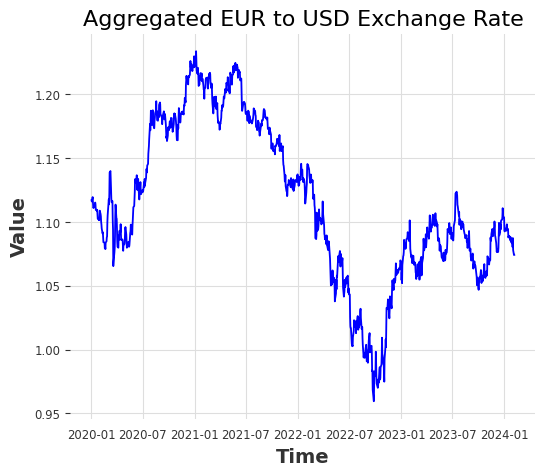

In [34]:
plt.figure(figsize=(6, 5))
plt.title("Aggregated EUR to USD Exchange Rate", size=16)
plt.ylabel("Value", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.plot(eurusd_agg_df, color="blue")
plt.savefig(os.path.join(PLOT_DIR, "eurusd_agg.png"))
plt.show()

## 6.2) Test for Stationarity/Unit Root Test

In [47]:
eurusd_agg_df = eurusd_agg_df.squeeze()

## 6.2.1) ADF test

In [ ]:
# ADF test is used to determine the presence of unit root in the series, 
# and hence helps in understand if the series 
# is stationary or not. The null and alternate hypothesis of this test are:

# Null Hypothesis: The series has a unit root.
# Alternate Hypothesis: The series has no unit root.

# If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

In [54]:
# ADF Test
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
adf_test(eurusd_agg_df)

Results of Dickey-Fuller Test:
Test Statistic                   -1.306364
p-value                           0.626256
#Lags Used                        0.000000
Number of Observations Used    1068.000000
Critical Value (1%)              -3.436488
Critical Value (5%)              -2.864250
Critical Value (10%)             -2.568213
dtype: float64


## 6.2.2) KPSS Test

In [ ]:
# KPSS is another test for checking the stationarity of a time series. 
# The null and alternate hypothesis for the KPSS 
# test are opposite that of the ADF test.

# Null Hypothesis: The process is trend stationary.
# Alternate Hypothesis: The series has a unit root (series is not stationary).

In [56]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [57]:
kpss_test(eurusd_agg_df)

Results of KPSS Test:
Test Statistic            2.490679
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Work\AppData\Local\Temp\ipykernel_53092\524574891.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
